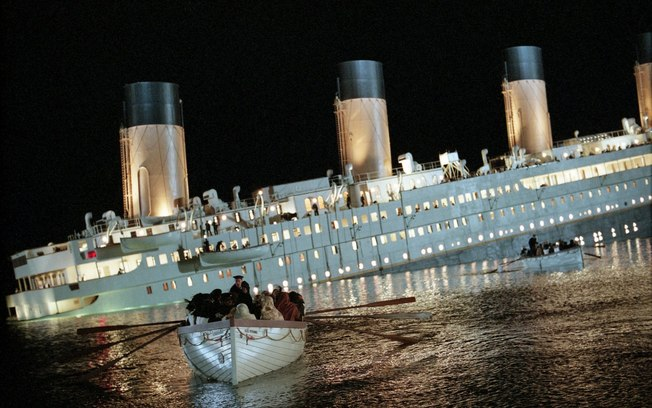

In [22]:
from IPython.display import Image
Image("cez1we59ynugpd9x3hvtgjlav.jpg", width = 1200, height = 100)

# ANALISE EXPLORATORIA DO DESASTRE DO TITANIC

### Perguntas a serem respondidas:
##### Dentre alguns dos questionamentos que podem ser gerados com estes 
##### dados, gostaria de saber a resposta para as seguindas perguntas:
<ul>
    <li> Quantas pessoas sobreviveram ao desastre, quantas pessoas não sobreviveram ?
    <li> A classe em que o passageiro encontrava-se foi um fator decisivo para a sobrevivência?
    <li> Qual foi a proporção de homens e mulheres que sobreviveram a tragédia?
    <li>Será que o número de sobreviventes meninas foi muito maior que os sobreviventes meninos?
    <li>Quem são os passageiros que não tiveram sua tarifa cobrada? Eles sobreviveram?
</ul>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
titanic = sns.load_dataset('titanic') # importando os dados da biblioteca seabor 
titanic.head() # cabeçalho do dataset

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
titanic.info() # Informações importantes para nossa análise 
# temos 891 linhas, na coluna age ou idade temos valores nulos,na coluna deck podemos observar que tem mais valores nulos em outras colunas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [32]:
titanic.drop(['class','adult_male','deck','embark_town','alive','alone'],axis = 1,inplace = True) # retirando colunas que não agrega na análise
titanic.head() # mostrando como ficou o dataset 

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [33]:
titanic.columns = ['Sobreviveu ?','Classe','Sexo','Idade','Tarifa','Embarque'] # Renomeando as colunas para uma melhor compreensão
titanic.head()

,Sobreviveu ?,Classe,Sexo,Idade,Tarifa,Embarque
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [40]:
titanic['Sobreviveu ?'] = titanic['Sobreviveu ?'].replace([0,1],['Não','Sim']) # Os valores na coluna sobreviveu mudados para não e sim 
titanic['Sexo'] = titanic['Sexo'].replace(['male','famale'],['Masculino','Feminino'])#mudando a coluna sexo do inglês para o português para um melhor entendimento

In [41]:
titanic.head() # como ficou o dataset

,Sobreviveu ?,Classe,Sexo,Idade,Tarifa,Embarque
0,Não,3,Masculino,22.0,7.2500,S
1,Sim,1,female,38.0,71.2833,C
2,Sim,3,female,26.0,7.9250,S
3,Sim,1,female,35.0,53.1000,S
4,Não,3,Masculino,35.0,8.0500,S


In [42]:
titanic.isnull().sum() # vamos ver quantos valores nulos temos nas colunas para que possamos tratalos
# na coluna idade temos 177 valores nulos no embarque temos 2, isso pode atrapalhar nossa análise

Sobreviveu ?      0
Classe            0
Sexo              0
Idade           177
Tarifa            0
Embarque          2
dtype: int64

In [43]:
titanic['Idade'].fillna(0,inplace = True) # Agora vamos tratar os valores nulos na coluna Idade colocando o valor 0 para cada valor nulo

In [44]:
titanic['Embarque'].fillna(0,inplace = True) # Vamos fazer a mesma coisa para a coluna embarque 

In [45]:
titanic.isnull().sum() # Agora vamos ver como ficou os valore, notem que não tem mas valores nulos no dataset

Sobreviveu ?    0
Classe          0
Sexo            0
Idade           0
Tarifa          0
Embarque        0
dtype: int64

In [46]:
titanic.describe() # A função describe permite saber rapidamente informações pertinentes nas colunas numéricas do dataset

,Classe,Idade,Tarifa
count,891.000000,891.000000,891.000000
mean,2.308642,23.799293,32.204208
std,0.836071,17.596074,49.693429
min,1.000000,0.000000,0.000000
25%,2.000000,6.000000,7.910400
50%,3.000000,24.000000,14.454200
75%,3.000000,35.000000,31.000000
max,3.000000,80.000000,512.329200


Text(0, 0.5, 'Numeros de Sobreviventes')

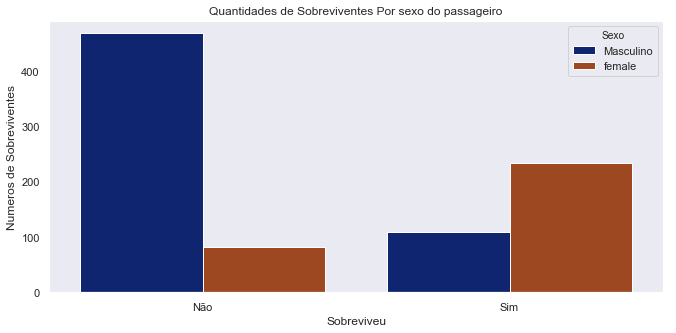

In [92]:
plt.figure(figsize = (11,5))     # nesse plot podemos a proporção de mortos por sexo podemos notar que teve mais mortes do sexo masculino
sns.countplot(data = titanic,x = 'Sobreviveu ?',hue = 'Sexo',palette = 'dark')
plt.title('Quantidades de Sobreviventes Por sexo do passageiro')
plt.xlabel('Sobreviveu')
plt.ylabel('Numeros de Sobreviventes')

In [70]:
titanic['Sexo'].value_counts() # temos mas precisamnete mais homens que mulheres no dataset

Masculino    577
female       314
Name: Sexo, dtype: int64

Text(0.5, 1.0, 'PROPORÇÃO DE SOBREVIVENTES POR SEXO')

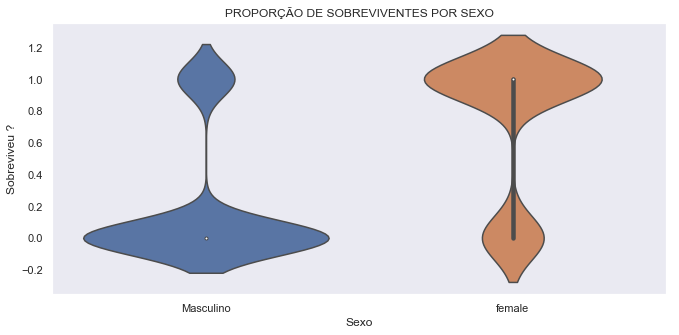

In [91]:
plt.figure(figsize = (11,5))
sns.set_style('dark')
sobrevitents_sexo = titanic.copy()
sobrevitents_sexo['Sobreviveu ?'] = sobrevitents_sexo['Sobreviveu ?'] == "Sim"

sns.violinplot(data = sobrevitents_sexo,y = 'Sobreviveu ?',x ='Sexo',size = 20)
plt.title('PROPORÇÃO DE SOBREVIVENTES POR SEXO')                            # nesse grafico podemos análisar que sobreviveu mais mulheres no acidente

In [99]:
prioridade = (titanic['Idade'] <= 15) & (titanic['Idade'] > 0) | (titanic['Sexo'] == 'female')
prioridade = titanic[prioridade]

In [101]:
prioridade.head()

,Sobreviveu ?,Classe,Sexo,Idade,Tarifa,Embarque
1,Sim,1,female,38.0,71.2833,C
2,Sim,3,female,26.0,7.9250,S
3,Sim,1,female,35.0,53.1000,S
7,Não,3,Masculino,2.0,21.0750,S
8,Sim,3,female,27.0,11.1333,S


Text(0, 0.5, 'Proporção')

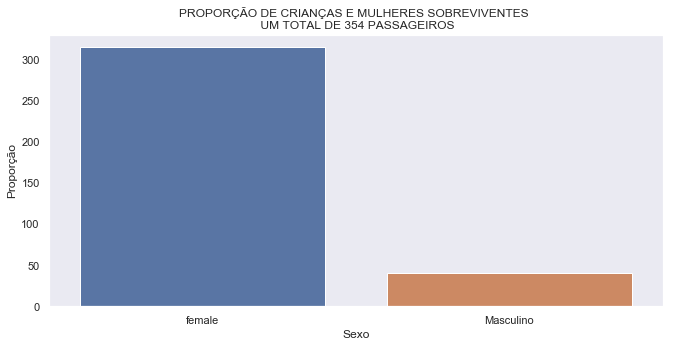

In [107]:
plt.figure(figsize = (11,5))
sns.countplot(data = prioridade,x = 'Sexo')
plt.title('PROPORÇÃO DE CRIANÇAS E MULHERES SOBREVIVENTES \n UM TOTAL DE {} PASSAGEIROS'.format(prioridade.shape[0]))
plt.ylabel('Proporção')

No grafico acima vimos podemos ver que mais de 70% das mulheres incluindo adulto e crianças sobreviveram a tragédia

## A sobrevivência que paga mais

In [5]:
titanic = sns.load_dataset('titanic')

Text(0.5, 0, 'Classes')

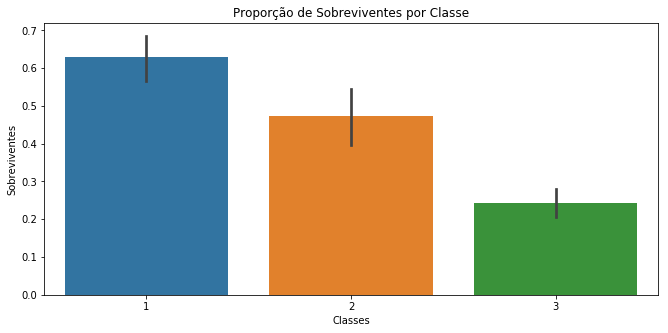

In [10]:
plt.figure(figsize = (11,5))
sns.barplot(x = 'pclass', y = 'survived',data = titanic)
plt.title('Proporção de Sobreviventes por Classe')
plt.ylabel('Sobreviventes')
plt.xlabel('Classes')

In [ ]:
print('nos')